# Итоговый проект 2. Разведыватенльный анализ данных

### Группа DST-45  /  Максим Красицкий

**Перед нами датасет, содержащий данные об успеваемости учеников по математике и условия их проживания.**
- **Цель проекта:** отследить взаимосвязь между этими данными, определить факторы группы риска.
- **Задача:** провести разведывательный анализ и определиться с параметрами будущей модели, предсказывающей результаты госэкзамена по математике. 
- Что считается **результатом:** Итоговый отчёт по проведённому анализу. 

## 1. Первичная обработка данных 

In [6]:
# импорт библиотек, нужных для анализа датасета 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [96]:
math = pd.read_csv('stud_math.xls') # импортировать дата-сет

In [97]:
display(math.head(10))
math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Выводы: перед нами датасет, в котором **394 строки данных учеников**, и **30 параметров**.
- **Численные столбцы:** **age** (возраст), **Medu** (образование матери), **Fedu** (образование отца), **traveltime** (время в пути до школы), **studytime** (время на учёбу помимо школы), **failures** (кол-во внеучебных неудач), **studytime,granular,** **famrel** (семейные отношения), **freetime** (свободное время после школы), **goout** (проведение времени с друзьями), **health** (текущее состояние здоровья), **absences** (кол-во пропущенных занятий), **score** (баллы по госэкзамену по математике). Всего: 13 таких столбцов. 

- **Строковые столбцы:** **school** (аббривиатура школы), **sex** (пол ученика), **address** (тип адреса), **famsize** (размер семьи), **Pstatus** (статус совместного жилья родителей), **Mjob** (работа матери), **Fjob** (работа отца), **reason** (причина выбора школы), **guardian** (опекун), **schoolsup** (доп. образовательная поддержка), **famsup** (семейная образовательная поддержка), **paid** (доп платные занятия по математике), **activities** (дополнительные внеучебные занятия), **nursery** (посещал ли детский сад), **higher** (хочет получать высшее образование), **internet** (наличие интернета дома), **romantic** (в романтических отношениях). Всего 17 таких столбцов. 

In [98]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Переименуем некоторые столбцы для дальнейшей работы: 

In [99]:
math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'] 
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## 1.1 Первичный анализ данных в столбцах (числовые)

### 'age' — возраст ученика (от 15 до 22)

In [100]:
pd.DataFrame(math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


Посмотрим распределение: 

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

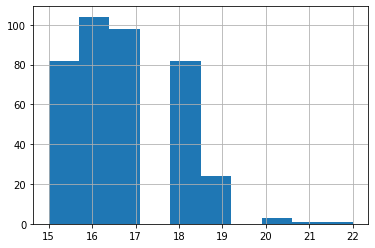

In [101]:
math.age.hist() 
math.age.describe()

Больше всего среди учеников 15 - 18 летних. Есть крайние значения, 22 года. 

## 'medu' — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [102]:
pd.DataFrame(math.medu.value_counts())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

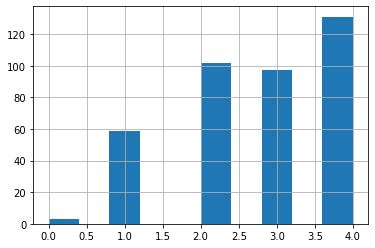

In [103]:
math.medu.hist() 
math.medu.describe()

В среднем имеют 3 - средне специальное образование или 11 классов. 

## 'fedu' — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [104]:
pd.DataFrame(math.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

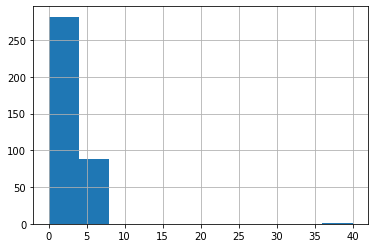

In [105]:
math.fedu.hist() 
math.fedu.describe()

А вот и наш первый вброс. Нужно его удалить. Он очевидный, поэтому вручную. 

In [106]:
math = math.loc[math.fedu <= 5]

In [107]:
pd.DataFrame(math.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


### 'traveltime' — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [108]:
pd.DataFrame(math.traveltime.value_counts())

,traveltime
1.0,225
2.0,92
3.0,21
4.0,7


count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

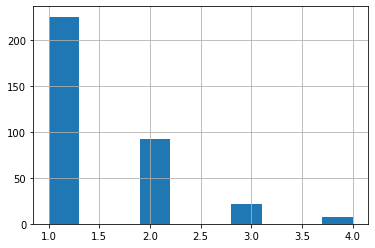

In [109]:
math.traveltime.hist() 
math.traveltime.describe()

Похоже, что большинство детей живёт рядом со школой. 

### 'studytime' — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [110]:
pd.DataFrame(math.studytime.value_counts())

,studytime
2.0,182
1.0,98
3.0,58
4.0,25


count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

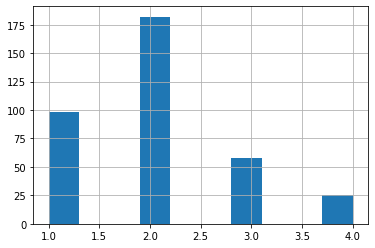

In [111]:
math.studytime.hist() 
math.studytime.describe()

В лидерах 2 — 2-5 часов в неделю. 

### 'failures' — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [112]:
pd.DataFrame(math.failures.value_counts())

,failures
0.0,277
1.0,45
3.0,15
2.0,14


count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

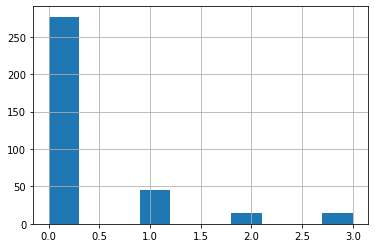

In [113]:
math.failures.hist() 
math.failures.describe()

Либо не принято говорить о неудачах, либо действительно большинство их не совершает. Интересно, откуда берутся записи об этих неудачах. Если из полицейских рапортов, то нужно проследить корреляцией с результатами тестов. Может быть интересный вывод. 

### 'studytime_granular' (описание отсутствует)

In [114]:
pd.DataFrame(math.studytime_granular.value_counts())

,studytime_granular
-6.0,182
-3.0,98
-9.0,58
-12.0,25


count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

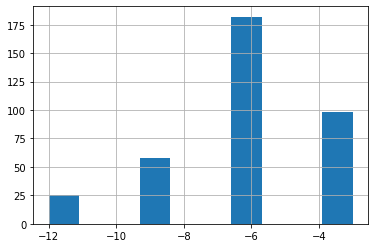

In [115]:
math.studytime_granular.hist() 
math.studytime_granular.describe()

гранулярный период обучения — таинственный признак, который предстоит разгадать. 

### 'famrel' — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [116]:
pd.DataFrame(math.famrel.value_counts())

,famrel
4.0,168
5.0,95
3.0,59
2.0,16
1.0,7
-1.0,1


count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

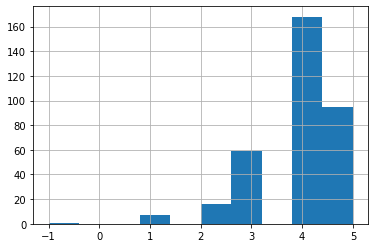

In [117]:
math.famrel.hist() 
math.famrel.describe()

А вот и второй вброс! У кого-то настолько плохие отношения, что он поставил "-1"! Ну или это ошибка. 
Надо удалить этот вброс. Делаем это вручную.

In [118]:
math = math.loc[math.famrel >= 1]

count    345.000000
mean       3.950725
std        0.902455
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

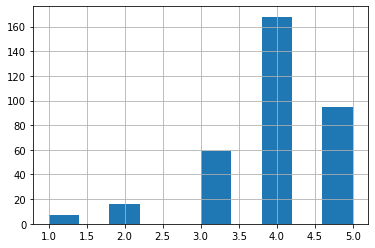

In [119]:
math.famrel.hist() 
math.famrel.describe()

Красота! 

### 'freetime' — свободное время после школы (от 1 - очень мало до 5 - очень мого) 

In [120]:
pd.DataFrame(math.freetime.value_counts())

,freetime
3.0,134
4.0,97
2.0,54
5.0,34
1.0,17


count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

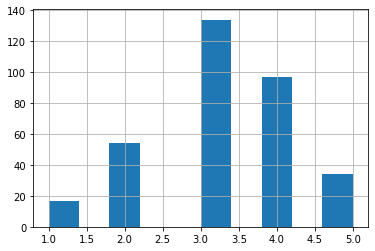

In [121]:
math.freetime.hist() 
math.freetime.describe()

У детей должно быть свободное время для игр! 

### 'goout' — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [122]:
pd.DataFrame(math.goout.value_counts())

,goout
3.0,115
2.0,87
4.0,71
5.0,45
1.0,19


count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

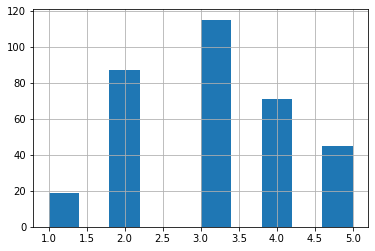

In [123]:
math.goout.hist() 
math.goout.describe()

Интересно проверить корреляции одиночек и компанейских. 

### 'health' — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [124]:
pd.DataFrame(math.health.value_counts())

,health
5.0,111
3.0,81
4.0,58
1.0,42
2.0,40


count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

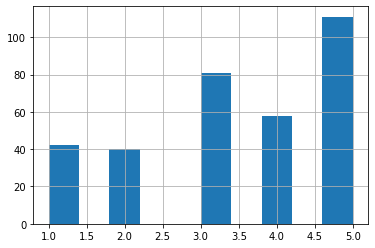

In [125]:
math.health.hist() 
math.health.describe()

У большинства - хорошее здоровье, что радует! 

### 'absences' — количество пропущенных занятий

In [126]:
pd.DataFrame(math.absences.value_counts())

,absences
0.0,95
2.0,54
4.0,47
6.0,27
8.0,21
10.0,14
12.0,11
14.0,9
3.0,8
16.0,7


count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

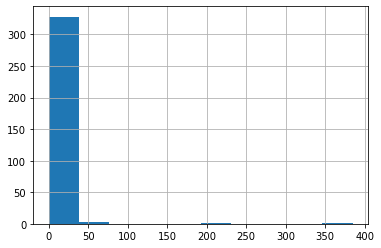

In [127]:
math.absences.hist() 
math.absences.describe()

По всей видимости в выборку попали школьники, которые пропустили несколько четвертей "385" "212". 
Нужно просмотреть эту строку. Сдавали ли они экзамен. И принять решение - оставлять ли их в выборке или удалить. 

Решил, что нужно отсечь значения больше 100, как вбросы.

In [128]:
math = math.loc[math.absences <= 100]

count    331.000000
mean       5.555891
std        7.363241
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       56.000000
Name: absences, dtype: float64

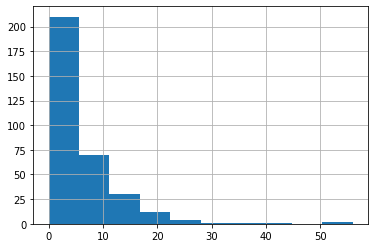

In [129]:
math.absences.hist() 
math.absences.describe()

### 'score' — баллы по госэкзамену по математике

In [130]:
pd.DataFrame(math.score.value_counts())

,score
50.0,50
55.0,42
0.0,30
65.0,28
60.0,25
75.0,25
40.0,24
70.0,23
45.0,19
80.0,16


count    326.000000
mean      52.147239
std       22.401712
min        0.000000
25%       41.250000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

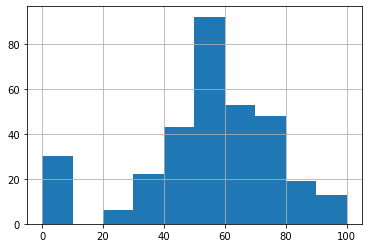

In [131]:
math.score.hist() 
math.score.describe()

Мы можем сказать: **100** — максимальный балл, **0** — минимальный. Вопрос: 37 (в оригинальном датасете) учеников вообще не сдавали экзамен, и получили "0". Что с ними делать? Можно ли их убрать из выборки, или наоборот, оставить, потому что они могут дать понятие о "группе риска" — тех, кто до экзамена не был допущен. 

Я решил отсечь эти значения. Так как комментария нет, то буду считать, что они не пришли на экзамен. 

In [132]:
math = math.loc[math.score > 0]

count    296.000000
mean      57.432432
std       15.757554
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

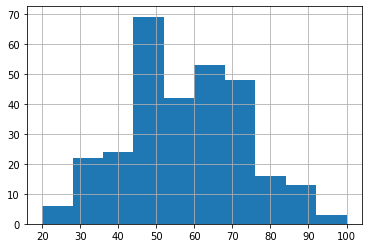

In [133]:
math.score.hist() 
math.score.describe()

Красота! Какой там проходной балл?

## 1.2 Первичный анализ данных в столбцах (строковые)

- **Строковые столбцы:** **school** (аббривиатура школы), **sex** (пол ученика), **address** (тип адреса), **famsize** (размер семьи), **Pstatus** (статус совместного жилья родителей), **Mjob** (работа матери), **Fjob** (работа отца), **reason** (причина выбора школы), **guardian** (опекун), **schoolsup** (доп. образовательная поддержка), **famsup** (семейная образовательная поддержка), **paid** (доп платные занятия по математике), **activities** (дополнительные внеучебные занятия), **nursery** (посещал ли детский сад), **higher** (хочет получать высшее образование), **internet** (наличие интернета дома), **romantic** (в романтических отношениях). Всего 17 таких столбцов. 

### 'school' — аббревиатура школы, в которой учится ученик 

In [134]:
pd.DataFrame(math.school.value_counts())

,school
GP,262
MS,34


### 'sex' — пол ученика ('F' - женский, 'M' - мужской)

In [135]:
pd.DataFrame(math.sex.value_counts())

,sex
F,158
M,138


### 'address' — тип адреса ученика ('U' - городской, 'R' - за городом)

In [136]:
pd.DataFrame(math.address.value_counts())

,address
U,224
R,62


### 'famsize' — размер семьи('LE3' <= 3, 'GT3' >3)

In [137]:
pd.DataFrame(math.famsize.value_counts())

,famsize
GT3,193
LE3,85


### 'pstatus' — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [138]:
pd.DataFrame(math.pstatus.value_counts())

,pstatus
T,234
A,26


### 'mjob' — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [139]:
pd.DataFrame(math.mjob.value_counts())

,mjob
other,99
services,71
at_home,44
teacher,39
health,27


### 'fjob' — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [140]:
pd.DataFrame(math.fjob.value_counts())

,fjob
other,155
services,74
teacher,20
at_home,12
health,10


### 'reason' — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [141]:
pd.DataFrame(math.reason.value_counts())

,reason
course,95
reputation,82
home,77
other,29


### 'guardian' — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [142]:
pd.DataFrame(math.guardian.value_counts())

,guardian
mother,188
father,63
other,19


### 'schoolsup' — дополнительная образовательная поддержка (yes или no)

In [143]:
pd.DataFrame(math.schoolsup.value_counts())

,schoolsup
no,248
yes,39


### 'famsup' — семейная образовательная поддержка (yes или no)

In [144]:
pd.DataFrame(math.famsup.value_counts())

,famsup
yes,160
no,106


### 'paid' — дополнительные платные занятия по математике (yes или no)

In [145]:
pd.DataFrame(math.paid.value_counts())

,paid
no,142
yes,123


### 'activities' — дополнительные внеучебные занятия (yes или no)

In [146]:
pd.DataFrame(math.activities.value_counts())

,activities
yes,144
no,141


### 'nursery' — посещал детский сад (yes или no)

In [147]:
pd.DataFrame(math.nursery.value_counts())

,nursery
yes,227
no,57


### 'higher' — хочет получить высшее образование (yes или no)

In [148]:
pd.DataFrame(math.higher.value_counts())

,higher
yes,270
no,11


### 'internet' — наличие интернета дома (yes или no)

In [149]:
pd.DataFrame(math.internet.value_counts())

,internet
yes,226
no,44


### 'romantic' — в романтических отношениях (yes или no)

In [150]:
pd.DataFrame(math.romantic.value_counts())

,romantic
no,183
yes,89


## 2. Корреляционный анализ количественных переменных 

Выясним, какие столбцы коррелируют с оценкой на экзамене по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

Корреляции рассмотрим только для числовых столбцов.
Для быстрого построения графиков зависимости переменных можно воспользоваться функцией pairplot из модуля seaborn:

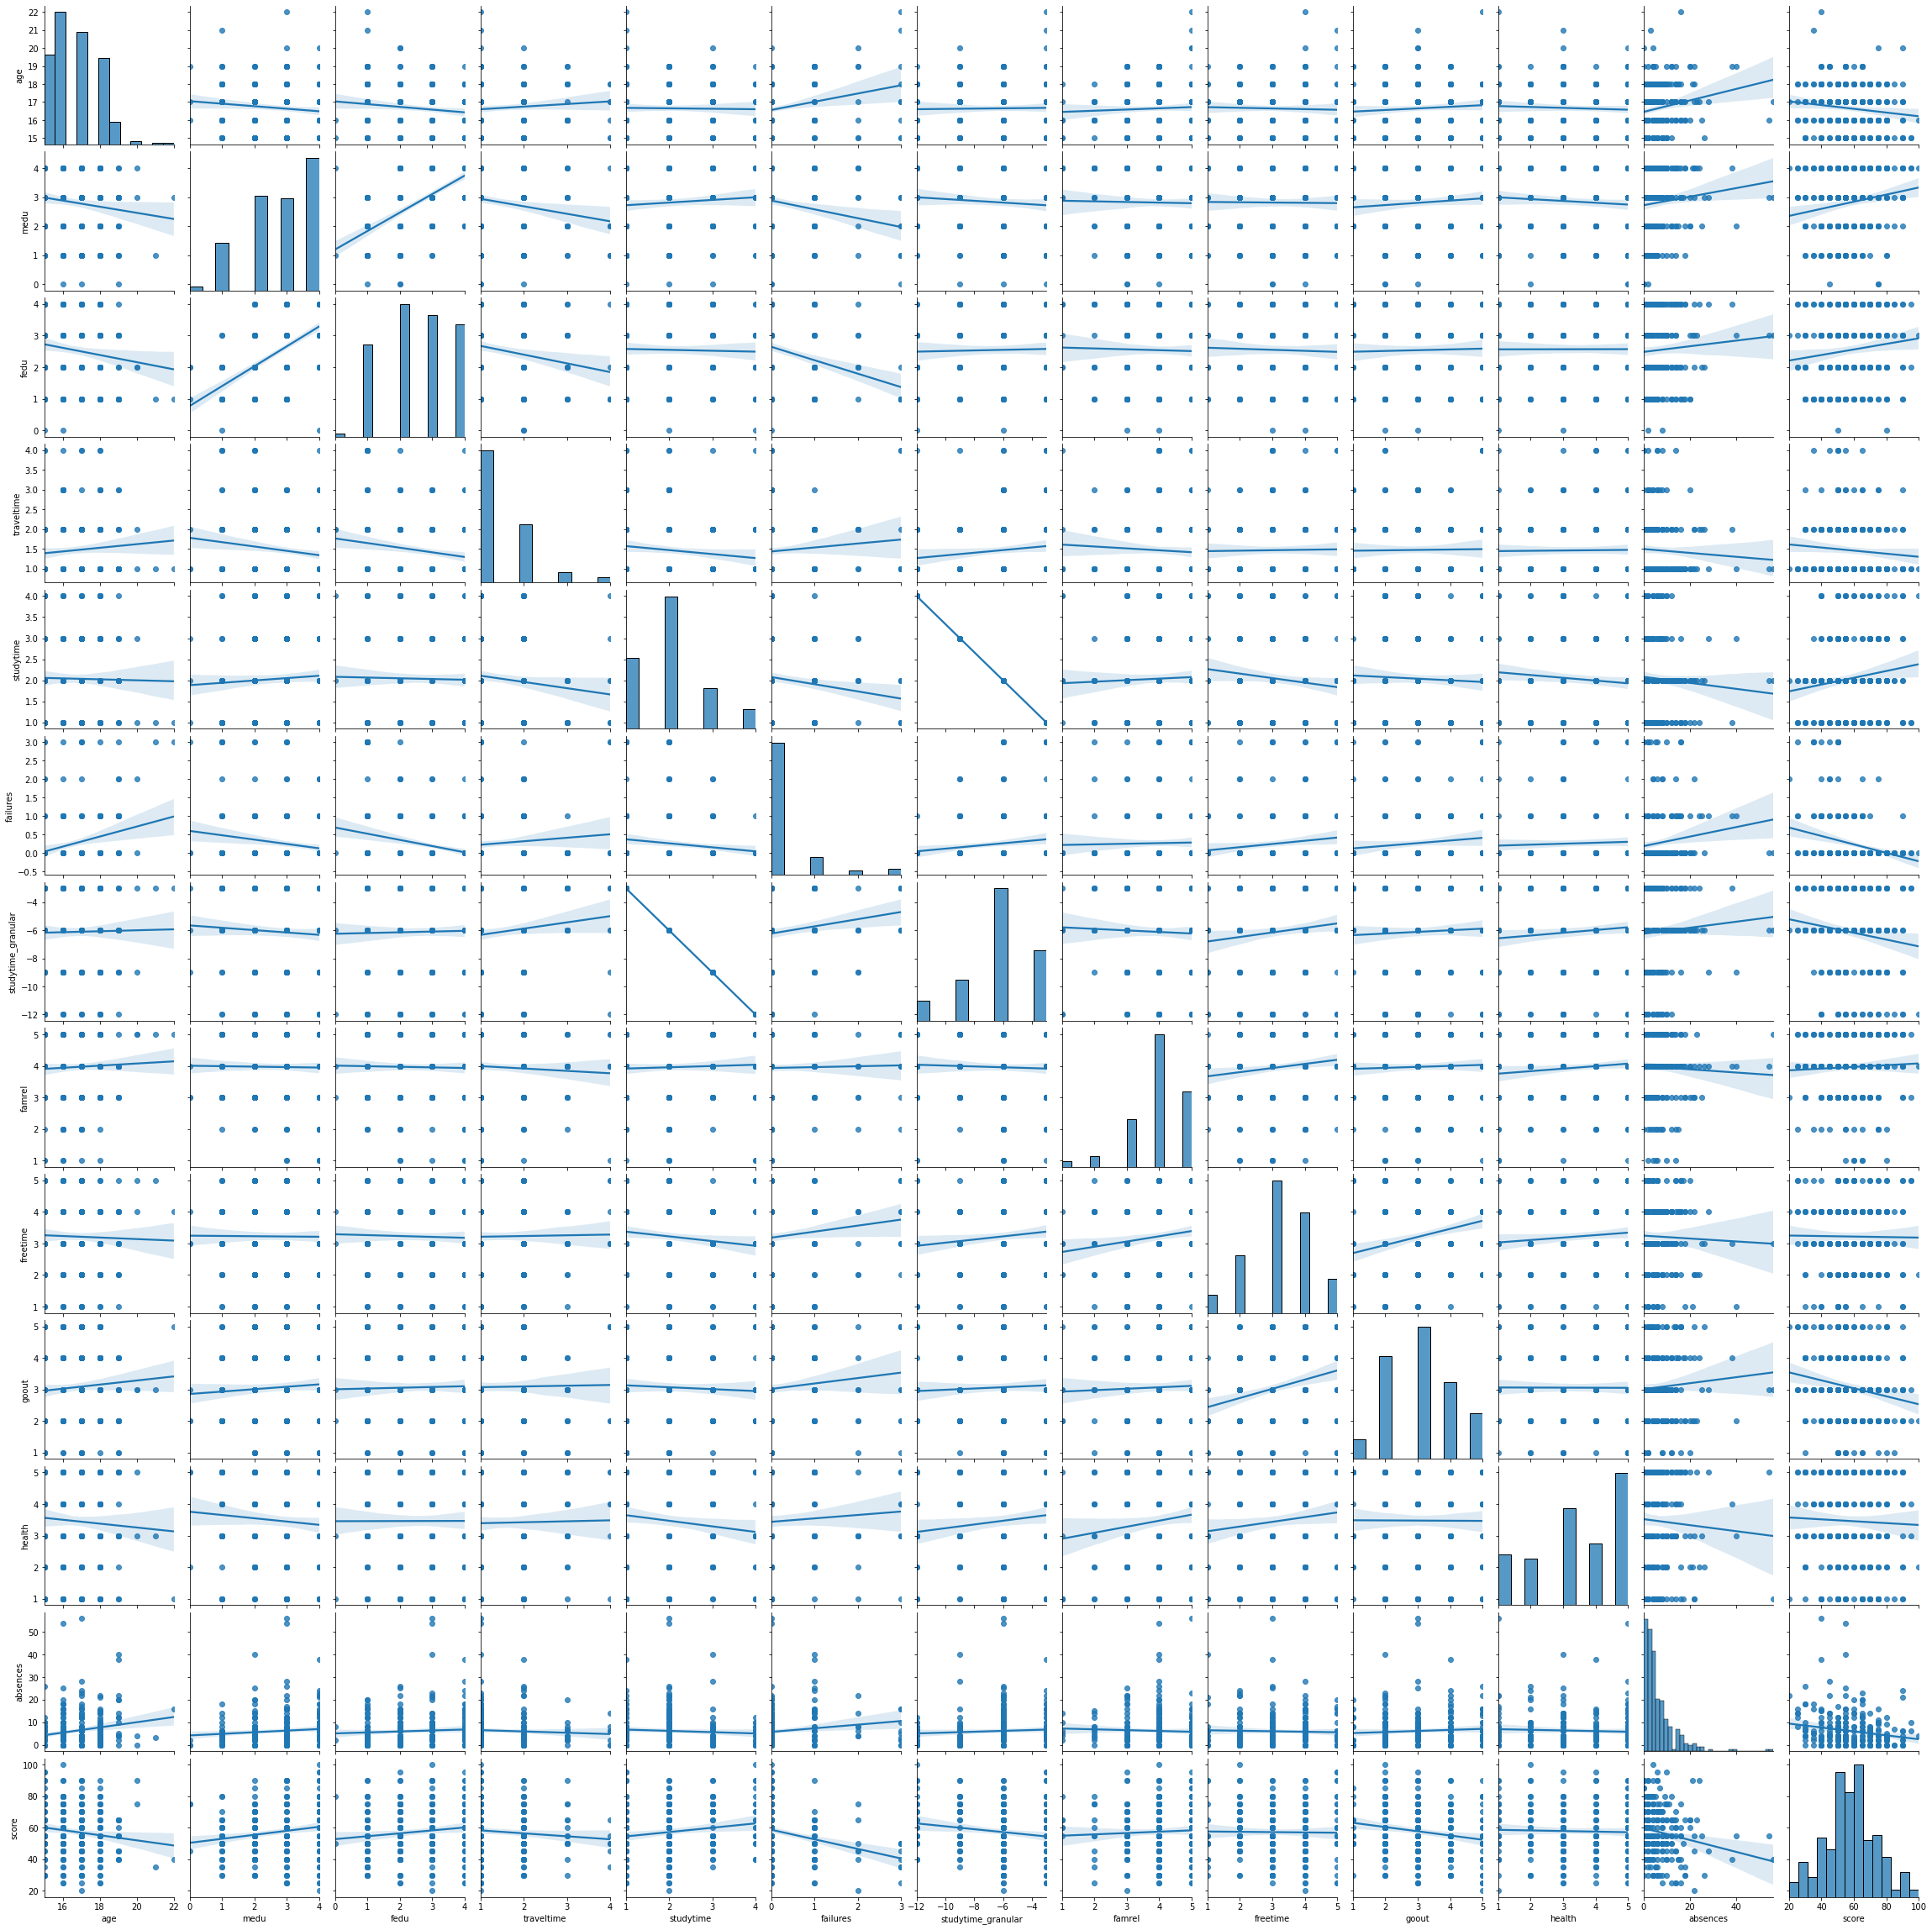

In [151]:
sns.pairplot(math, kind = 'reg')

Не знаю, как этим пользоваться. В примере было как-то нагляднее. 

Используем для наглядности матрицу корреляций:

In [152]:
math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.121777,-0.131275,0.081641,-0.016761,0.248556,0.016761,0.047913,-0.029774,0.075850,-0.055506,0.191553,-0.129530
medu,-0.121777,1.000000,0.633534,-0.168856,0.071598,-0.189178,-0.071598,-0.017684,-0.009434,0.076914,-0.080423,0.102373,0.176149
fedu,-0.131275,0.633534,1.000000,-0.180165,-0.022392,-0.266709,0.022392,-0.022907,-0.030331,0.024430,0.001726,0.062221,0.127480
traveltime,0.081641,-0.168856,-0.180165,1.000000,-0.122454,0.097416,0.122454,-0.060292,0.016263,0.015348,0.015257,-0.053440,-0.085483
studytime,-0.016761,0.071598,-0.022392,-0.122454,1.000000,-0.136115,-1.000000,0.038382,-0.126557,-0.048393,-0.107636,-0.063713,0.148863
failures,0.248556,-0.189178,-0.266709,0.097416,-0.136115,1.000000,0.136115,0.021303,0.128123,0.110760,0.052505,0.143490,-0.262781
studytime_granular,0.016761,-0.071598,0.022392,0.122454,-1.000000,0.136115,1.000000,-0.038382,0.126557,0.048393,0.107636,0.063713,-0.148863
famrel,0.047913,-0.017684,-0.022907,-0.060292,0.038382,0.021303,-0.038382,1.000000,0.147038,0.037946,0.122917,-0.042859,0.047958
freetime,-0.029774,-0.009434,-0.030331,0.016263,-0.126557,0.128123,0.126557,0.147038,1.000000,0.272872,0.107494,-0.031848,-0.012593
goout,0.075850,0.076914,0.024430,0.015348,-0.048393,0.110760,0.048393,0.037946,0.272872,1.000000,-0.003843,0.066747,-0.183775


**Выводы:** 
- **score** положительно коррелирует: **medu** (0.176149), **studytime** (0.148863), **fedu** (0.127480). 
- **score** отрицательно коррелирует:: **failures** (-0.262781), **goout** (-0.183775), **absences** (-0.180839) и **studytime_granular** (-0.148863). 

## 3. Анализ номинативных переменных

Строковые столбцы: school (аббривиатура школы), sex (пол ученика), address (тип адреса), famsize (размер семьи), Pstatus (статус совместного жилья родителей), Mjob (работа матери), Fjob (работа отца), reason (причина выбора школы), guardian (опекун), schoolsup (доп. образовательная поддержка), famsup (семейная образовательная поддержка), paid (доп платные занятия по математике), activities (дополнительные внеучебные занятия), nursery (посещал ли детский сад), higher (хочет получать высшее образование), internet (наличие интернета дома), romantic (в романтических отношениях). Всего 17 таких столбцов.

In [154]:
def get_boxplot(column): 
    fig, ax = plt.subplots(figsize = (14, 4)) 
    sns.boxplot(x=column, y='score',  
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])], 
               ax=ax) 
    plt.xticks(rotation=45) 
    ax.set_title('Boxplot for ' + column) 
    plt.show()

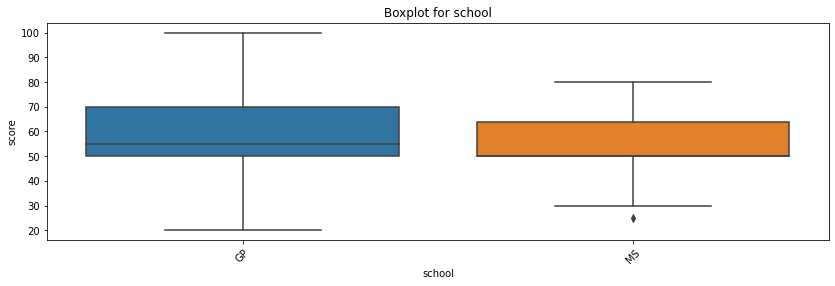

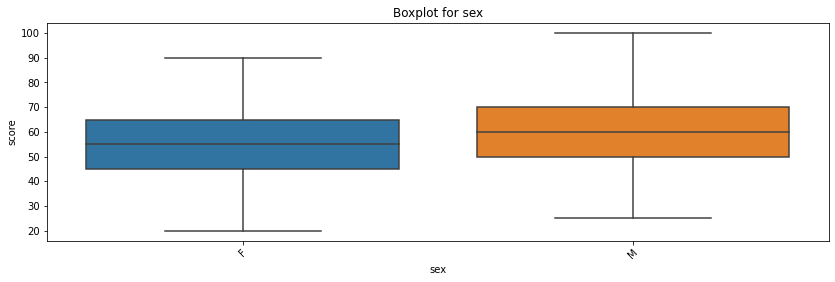

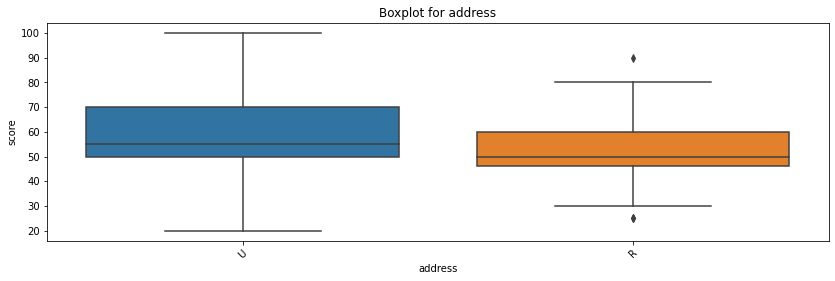

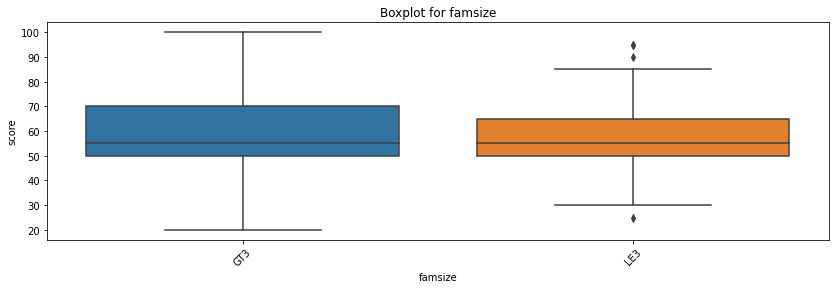

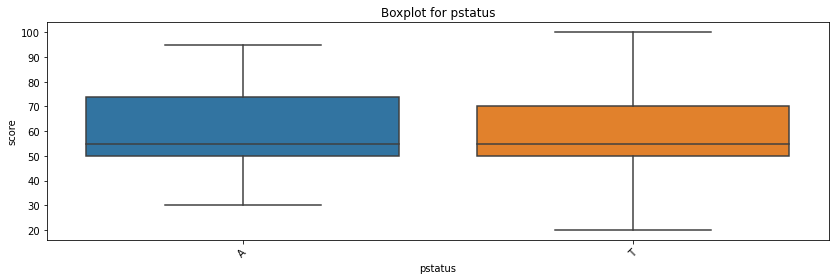

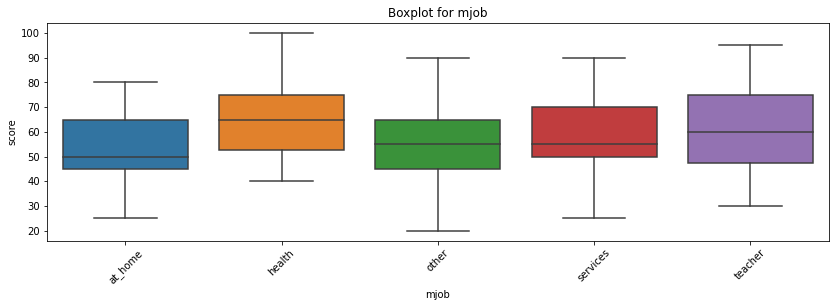

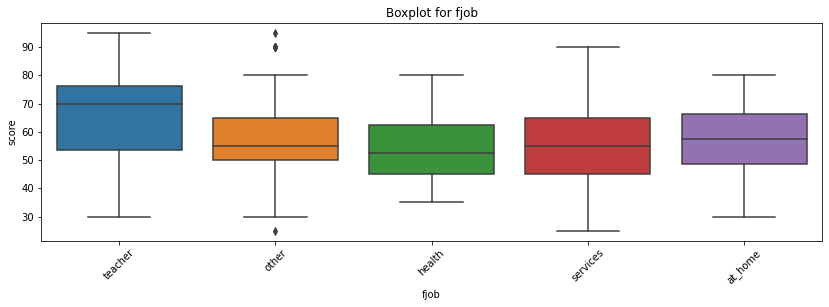

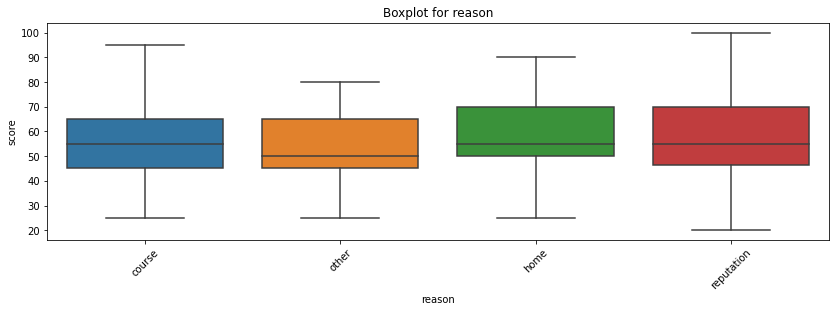

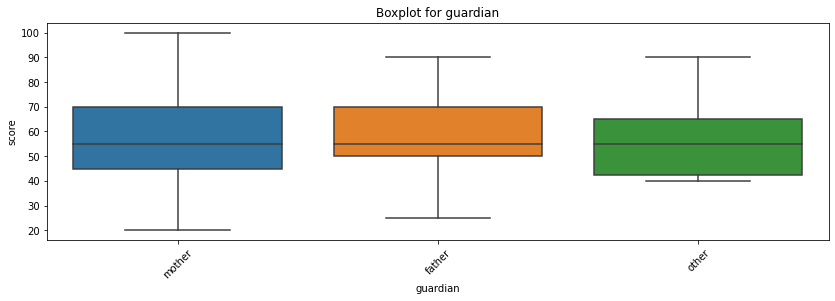

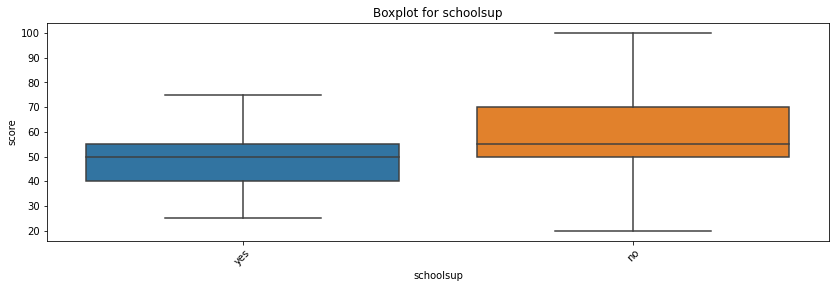

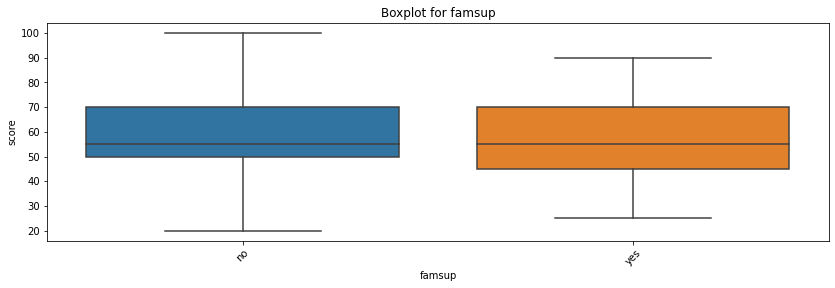

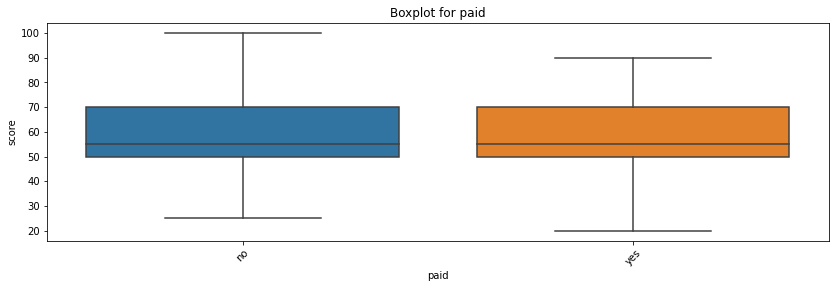

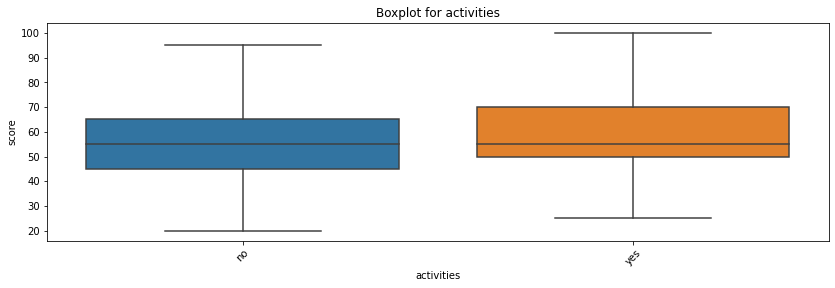

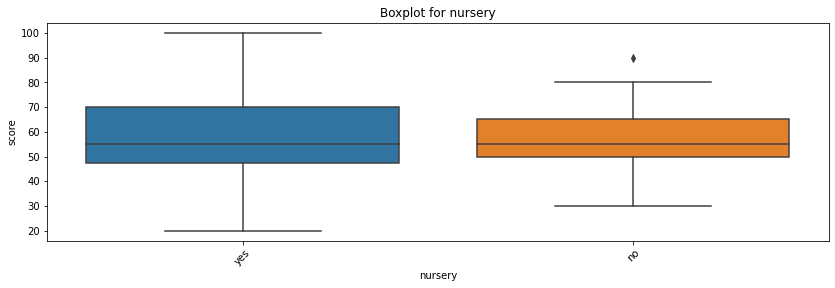

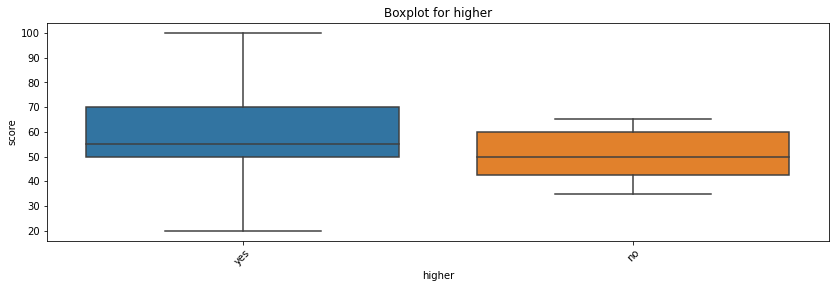

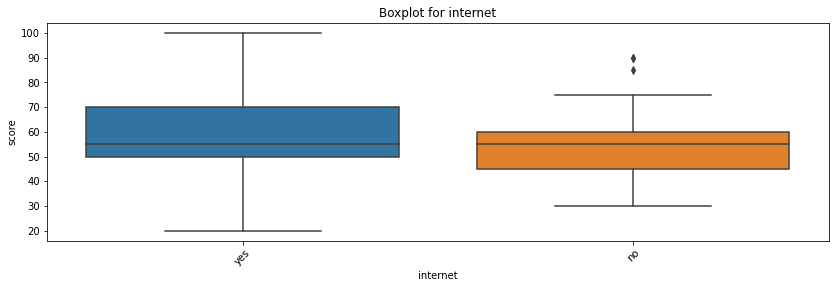

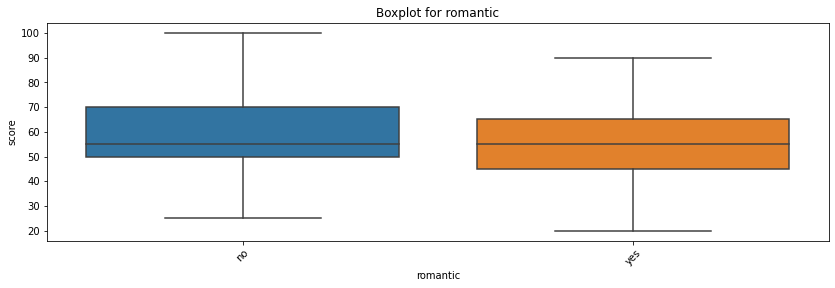

In [155]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup'
            , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']: 
    get_boxplot(col)

Судя по графикам (усы) можно сказать следующее: 
- Ученики школы GP в среднем имеют более высокие баллы по экзамену. Но и больший разброс баллов. 
- Ученики, где мама или папа - учителя имеют более высокие баллы. 
- Интересно, что те ученики, которые имеют дополнительную образовательную поддержку schoolsup имеют более низкий балл.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью **теста Стьюдента**. Проверим нулевую гипотезу о том, что распределения оценок по различным параметрам неразличимы:

In [156]:
def get_stat_dif(column): 
    cols = math.loc[:, column].value_counts().index[:] 
    combinations_all = list(combinations(cols, 2)) 
    for comb in combinations_all: 
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'],  
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all): # Учли поправку Бонферони 
            print('Найдены статистически значимые различия для колонки', column) 
            break

In [157]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup'
            , 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']: 
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, серьёзно отличаются параметры: **address**, **mjob**, **schoolsup (отрицательно влияет)**. Оставим эти переменные в датасете для дальнейшего построения модели. 

**Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: address, mjob, schoolsup, medu, failures, goout, absences.**

In [158]:
math_for_model = math.loc[:, ['address', 'mjob', 'schoolsup', 'medu', 'failures', 'goout', 'absences']] 
math_for_model.head()

,address,mjob,schoolsup,medu,failures,goout,absences
0,U,at_home,yes,4.0,0.0,4.0,6.0
1,U,at_home,no,1.0,0.0,3.0,4.0
2,U,at_home,yes,1.0,3.0,2.0,10.0
3,U,health,no,4.0,0.0,2.0,2.0
4,U,other,no,3.0,0.0,2.0,4.0


## Выводы

В результате EDA для анализа влияния влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:
- В данных достаточно мало пустых значений (non-null) и выбросов.
- Выбросы найдены только в столбцах с Fedu (1), famrel (1), absences (2), что позволяет сделать вывод о том, что данные достаточно чистые.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это **address, mjob, schoolsup, medu, failures, goout, absences**. Некоторые из них оказывают положительную корреляцию на результаты экзамена, некоторые — отрицательную. "Группу риска", скорее всего, можно будет определить по тем параметрам, которые оказывают отрицательную корреляцию. 